In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [44]:
df = pd.read_csv('data\Task_Prioritization_Dataset.csv')

In [45]:
df.head()

,Task_ID,Task_Name,Priority,Deadline,Estimated_Time,Task_Type,Dependency,Employee_ID,Completion_Status,Urgency_Score
0,1,Task 1: Sample Task Description,Medium,2025-01-28 09:00,2 hours,Analysis,NaN,101,In Progress,2
1,2,Task 2: Sample Task Description,Low,2025-01-28 10:00,3 hours,Review,Task_ID 1,102,Completed,3
2,3,Task 3: Sample Task Description,High,2025-01-28 11:00,4 hours,Meeting,Task_ID 2,103,Pending,4
3,4,Task 4: Sample Task Description,Medium,2025-01-28 12:00,5 hours,Planning,Task_ID 3,104,In Progress,5
4,5,Task 5: Sample Task Description,Low,2025-01-28 13:00,1 hours,Analysis,Task_ID 4,105,Completed,6


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Task_ID            100 non-null    int64 
 1   Task_Name          100 non-null    object
 2   Priority           100 non-null    object
 3   Deadline           100 non-null    object
 4   Estimated_Time     100 non-null    object
 5   Task_Type          100 non-null    object
 6   Dependency         99 non-null     object
 7   Employee_ID        100 non-null    int64 
 8   Completion_Status  100 non-null    object
 9   Urgency_Score      100 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 7.9+ KB


In [47]:
df.isna().sum()

Task_ID              0
Task_Name            0
Priority             0
Deadline             0
Estimated_Time       0
Task_Type            0
Dependency           1
Employee_ID          0
Completion_Status    0
Urgency_Score        0
dtype: int64

In [48]:
df['Deadline'] = pd.to_datetime(df['Deadline'])

In [49]:
import joblib
for i in ['Priority', 'Task_Type','Completion_Status']:
    label_encoder = LabelEncoder()
    df[i]=label_encoder.fit_transform(df[i])
    joblib.dump(label_encoder,i)


In [50]:
df = df.drop(['Task_ID', 'Task_Name', 'Employee_ID','Dependency'], axis=1)


In [51]:
df.head()

,Priority,Deadline,Estimated_Time,Task_Type,Completion_Status,Urgency_Score
0,2,2025-01-28 09:00:00,2 hours,0,1,2
1,1,2025-01-28 10:00:00,3 hours,3,0,3
2,0,2025-01-28 11:00:00,4 hours,1,2,4
3,2,2025-01-28 12:00:00,5 hours,2,1,5
4,1,2025-01-28 13:00:00,1 hours,0,0,6


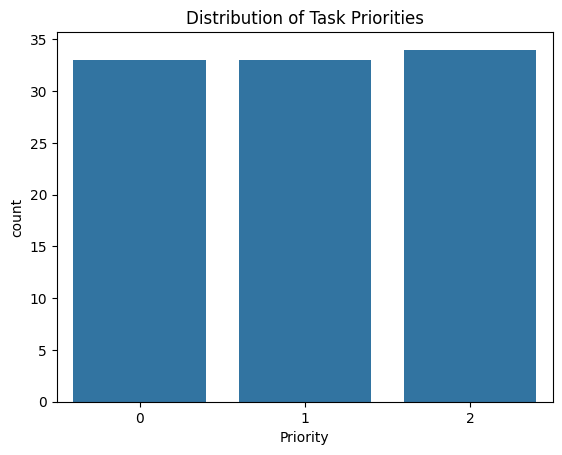

In [52]:
sns.countplot(x='Priority', data=df)
plt.title('Distribution of Task Priorities')
plt.show()

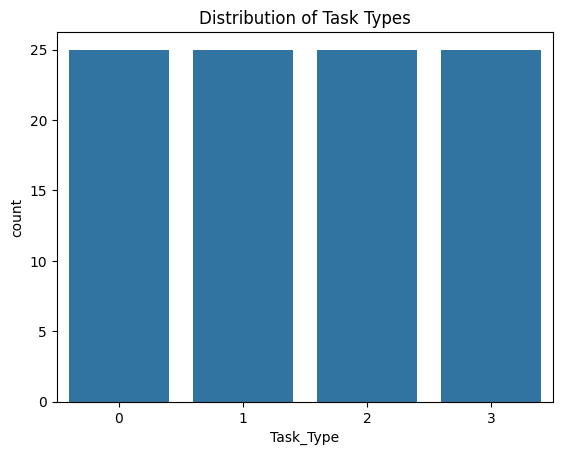

In [53]:
sns.countplot(x='Task_Type', data=df)
plt.title('Distribution of Task Types')
plt.show()

In [54]:
df['Estimated_Time'] = df['Estimated_Time'].str.extract('(\d+)').astype(float)
    

In [55]:
df.head()

,Priority,Deadline,Estimated_Time,Task_Type,Completion_Status,Urgency_Score
0,2,2025-01-28 09:00:00,2.0,0,1,2
1,1,2025-01-28 10:00:00,3.0,3,0,3
2,0,2025-01-28 11:00:00,4.0,1,2,4
3,2,2025-01-28 12:00:00,5.0,2,1,5
4,1,2025-01-28 13:00:00,1.0,0,0,6


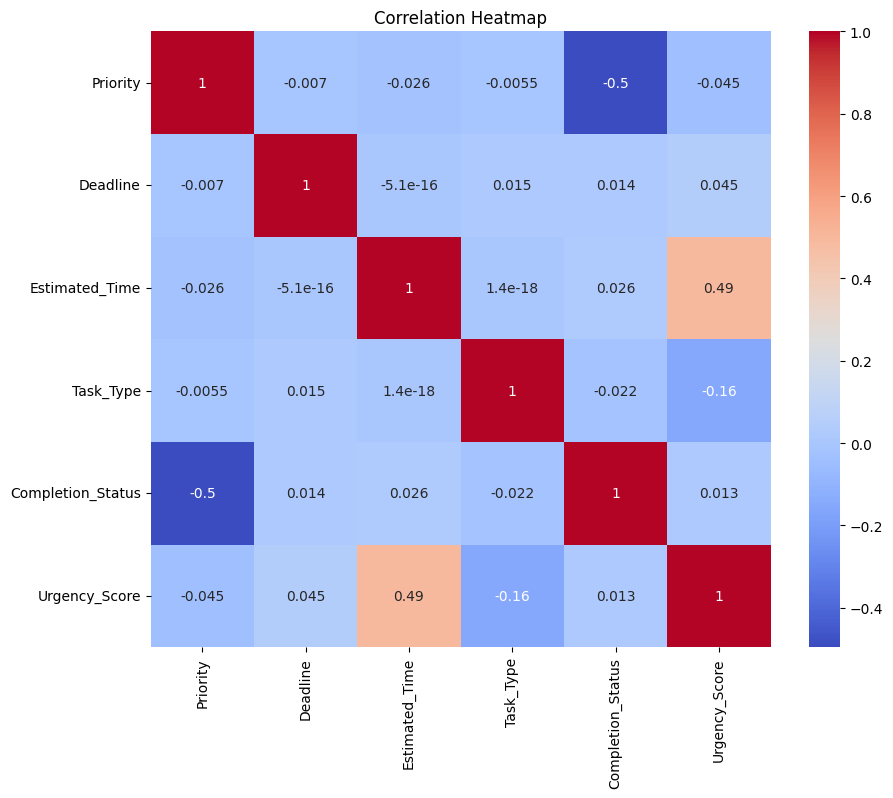

In [56]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [57]:
df.head()

,Priority,Deadline,Estimated_Time,Task_Type,Completion_Status,Urgency_Score
0,2,2025-01-28 09:00:00,2.0,0,1,2
1,1,2025-01-28 10:00:00,3.0,3,0,3
2,0,2025-01-28 11:00:00,4.0,1,2,4
3,2,2025-01-28 12:00:00,5.0,2,1,5
4,1,2025-01-28 13:00:00,1.0,0,0,6


In [58]:
from datetime import datetime

current_time = datetime.now()

# Calculate the difference between 'Deadline' and current time
df['Time_Remaining'] = (df['Deadline'] - current_time).dt.total_seconds() / 3600

In [59]:
X = df.drop(['Priority','Deadline'], axis=1)
y = df['Priority']


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [65]:
X.head()

,Estimated_Time,Task_Type,Completion_Status,Urgency_Score,Time_Remaining
0,2.0,0,1,2,-37.666549
1,3.0,3,0,3,-36.666549
2,4.0,1,2,4,-35.666549
3,5.0,2,1,5,-34.666549
4,1.0,0,0,6,-33.666549


In [66]:
joblib.dump(model,'model')

['model']

In [91]:
task_list = [
    {
     "Deadline": "2025-01-28 09:00", 
     "Estimated_Time": "2 hours", 
     "Task_Type": "Analysis",
     "Completion_Status": "In Progress",
     "Urgency_Score":7,
    },
]

In [92]:
X_train.head()

,Estimated_Time,Task_Type,Completion_Status,Urgency_Score,Time_Remaining
55,2.0,2,0,7,17.333451
88,5.0,0,0,10,50.333451
26,3.0,1,2,8,-11.666549
42,4.0,1,1,4,4.333451
69,1.0,3,1,1,31.333451


In [ ]:
import joblib
Task_Type= joblib.load("Task_Type")
Completion_Status= joblib.load("Completion_Status")
current_time = datetime.now()

def prioritize_tasks(task_list):
    tasks_df = pd.DataFrame(task_list)
    tasks_df['Estimated_Time']=tasks_df['Estimated_Time'].str.extract('(\d+)').astype(float)
   
    tasks_df['Task_Type']=Task_Type.transform(tasks_df['Task_Type'])
    tasks_df['Completion_Status']=Completion_Status.transform(tasks_df['Completion_Status'])
    tasks_df['Deadline'] = pd.to_datetime(tasks_df['Deadline'])
    tasks_df['Time_Remaining']=(tasks_df['Deadline'] - current_time).dt.total_seconds() / 3600
   
    tasks_df['Predicted_Priority'] = model.predict(tasks_df.drop(['Deadline'], axis=1))
    
    ordered_tasks = tasks_df.sort_values(by='Predicted_Priority')
    
    return ordered_tasks

ordered_tasks = prioritize_tasks(task_list)

In [103]:
ordered_tasks.to_dict()

{'Deadline': {0: Timestamp('2025-01-28 09:00:00')},
 'Estimated_Time': {0: 2.0},
 'Task_Type': {0: 0},
 'Completion_Status': {0: 1},
 'Urgency_Score': {0: 7},
 'Time_Remaining': {0: -38.09025964194445},
 'Predicted_Priority': {0: 2}}